In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_poly = np.zeros(DEG + 1, dtype=np.complex128)
#base_poly = np.random.normal(size=(DEG + 1, 2), scale=BASE_STDEV).view(np.complex128)[:, 0]
#base_poly[-2] = -1
base_poly[0] = 1

perturb = np.random.normal(size=(NUM_SAMPLES, DEG + 1, 2), scale=PERTURB_STDEV).view(np.complex128)[:, :, 0]
perturb[:, 0] = 0

polys = base_poly + perturb
polys.shape

NameError: name 'DEG' is not defined

In [9]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0], 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(18,4))
    plt.subplot(1, 3, 1)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(np.percentile(root_radii, 1) - 0.1, np.percentile(root_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 2)
    plt.hist(
        np.angle(roots.flatten()),
        bins=64,
        density=True,
    )
    plt.xlabel("angle")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 3)
    plt.hist2d(
        x=roots.flatten().real,
        y=roots.flatten().imag,
        bins=hist2dbins,
    )
    plt.axis('square')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f"deg={base_poly.shape[0] - 1}")

## Perturbing z^n
Each of the lower degree coefficients is a standard complex normal distribution with unit variance.

We plot $n = 3, 10, 100$ below.
We see that $n$ increases the distribution of the radius of the roots gets tighter around 1.

CPU times: user 2.55 s, sys: 49.6 ms, total: 2.6 s
Wall time: 2.56 s


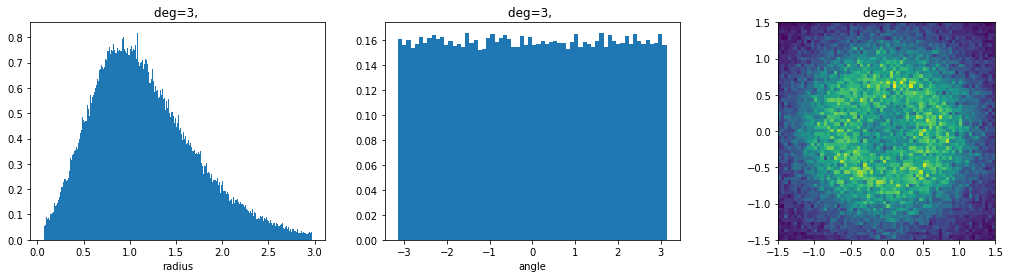

In [10]:
%%time
perturb_and_plot_roots(
    np.array([1] + 3 * [0], dtype=np.complex128),
    num_samples=40000,
    hist2dbins=180,
)

CPU times: user 896 ms, sys: 20.5 ms, total: 916 ms
Wall time: 906 ms


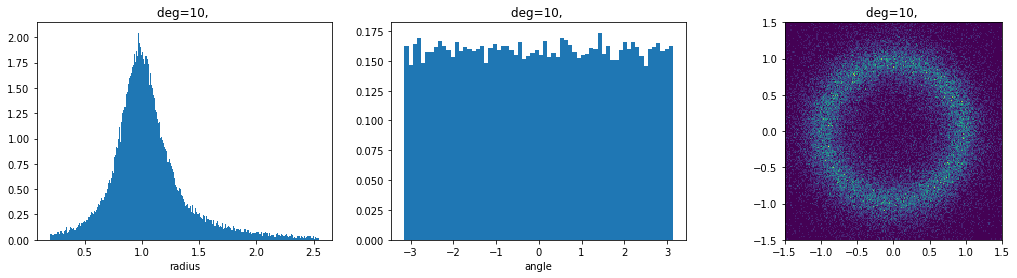

In [11]:
%%time
perturb_and_plot_roots(
    np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=5000
)

CPU times: user 20.1 s, sys: 189 ms, total: 20.3 s
Wall time: 5.25 s


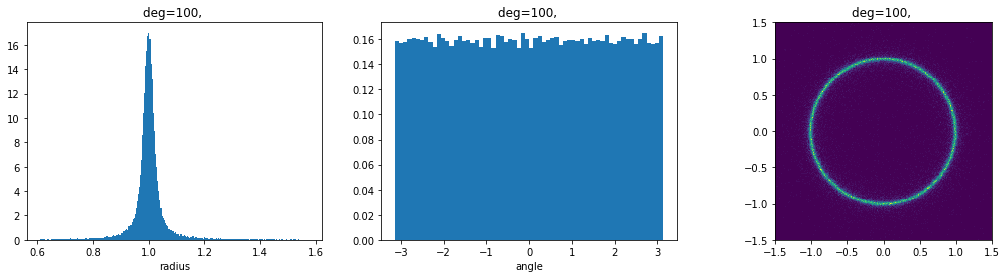

In [12]:
%%time
perturb_and_plot_roots(
    np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=500
)

## Perturbing polynomial with roots distributed as complex normal